# English Tweet Visualisation

This notebook contains the visualisations of English tweets in OffenseEval 2020.

In [2]:
import pandas as pd
import numpy as np

full = pd.read_csv("data/English/olid-training-v1.0.tsv", sep='\t')

full[:10]

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


In [3]:
print('Average word length of tweets in dataset is {0:.0f}.'.format(np.mean(full['tweet'].apply(lambda x: len(x.split())))))

Average word length of tweets in dataset is 22.


In [4]:
print('Max word length of tweets in dataset is {0:.0f}.'.format(np.max(full['tweet'].apply(lambda x: len(x.split())))))

Max word length of tweets in dataset is 103.


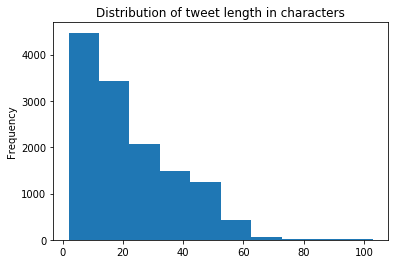

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

full['tweet'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.title('Distribution of tweet length in characters');

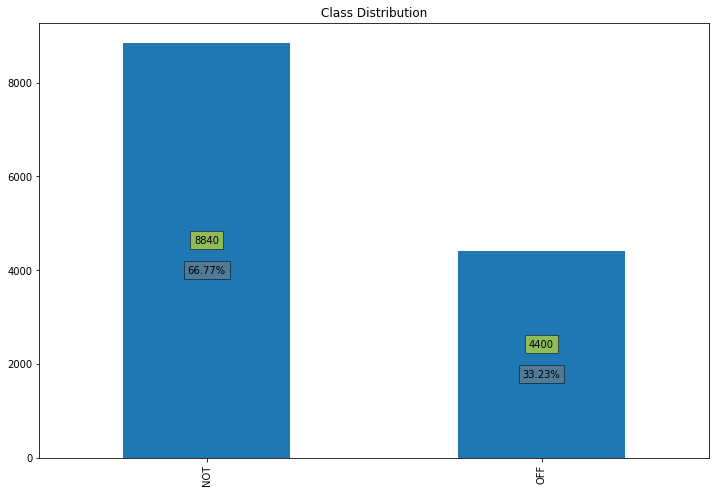

In [6]:
from visualisation import plot_data

plot_data(full, "subtask_a")

In [7]:
from visualisation import plot_word_cloud

NOT_OFFENSIVE = full[(full['subtask_a'] == 'NOT')]
OFFENSE = full[(full['subtask_a'] == 'OFF')]


word cloud for not offensive posts

/home/tharindu/Projects/OffensEval_2020/visualisation.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df["tweet"].apply(lambda x: remove_words(x))
/home/tharindu/Projects/OffensEval_2020/visualisation.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df["tweet"].apply(lambda x: clean_text(x))
/home/tharindu/Projects/OffensEval_2020/visualisation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

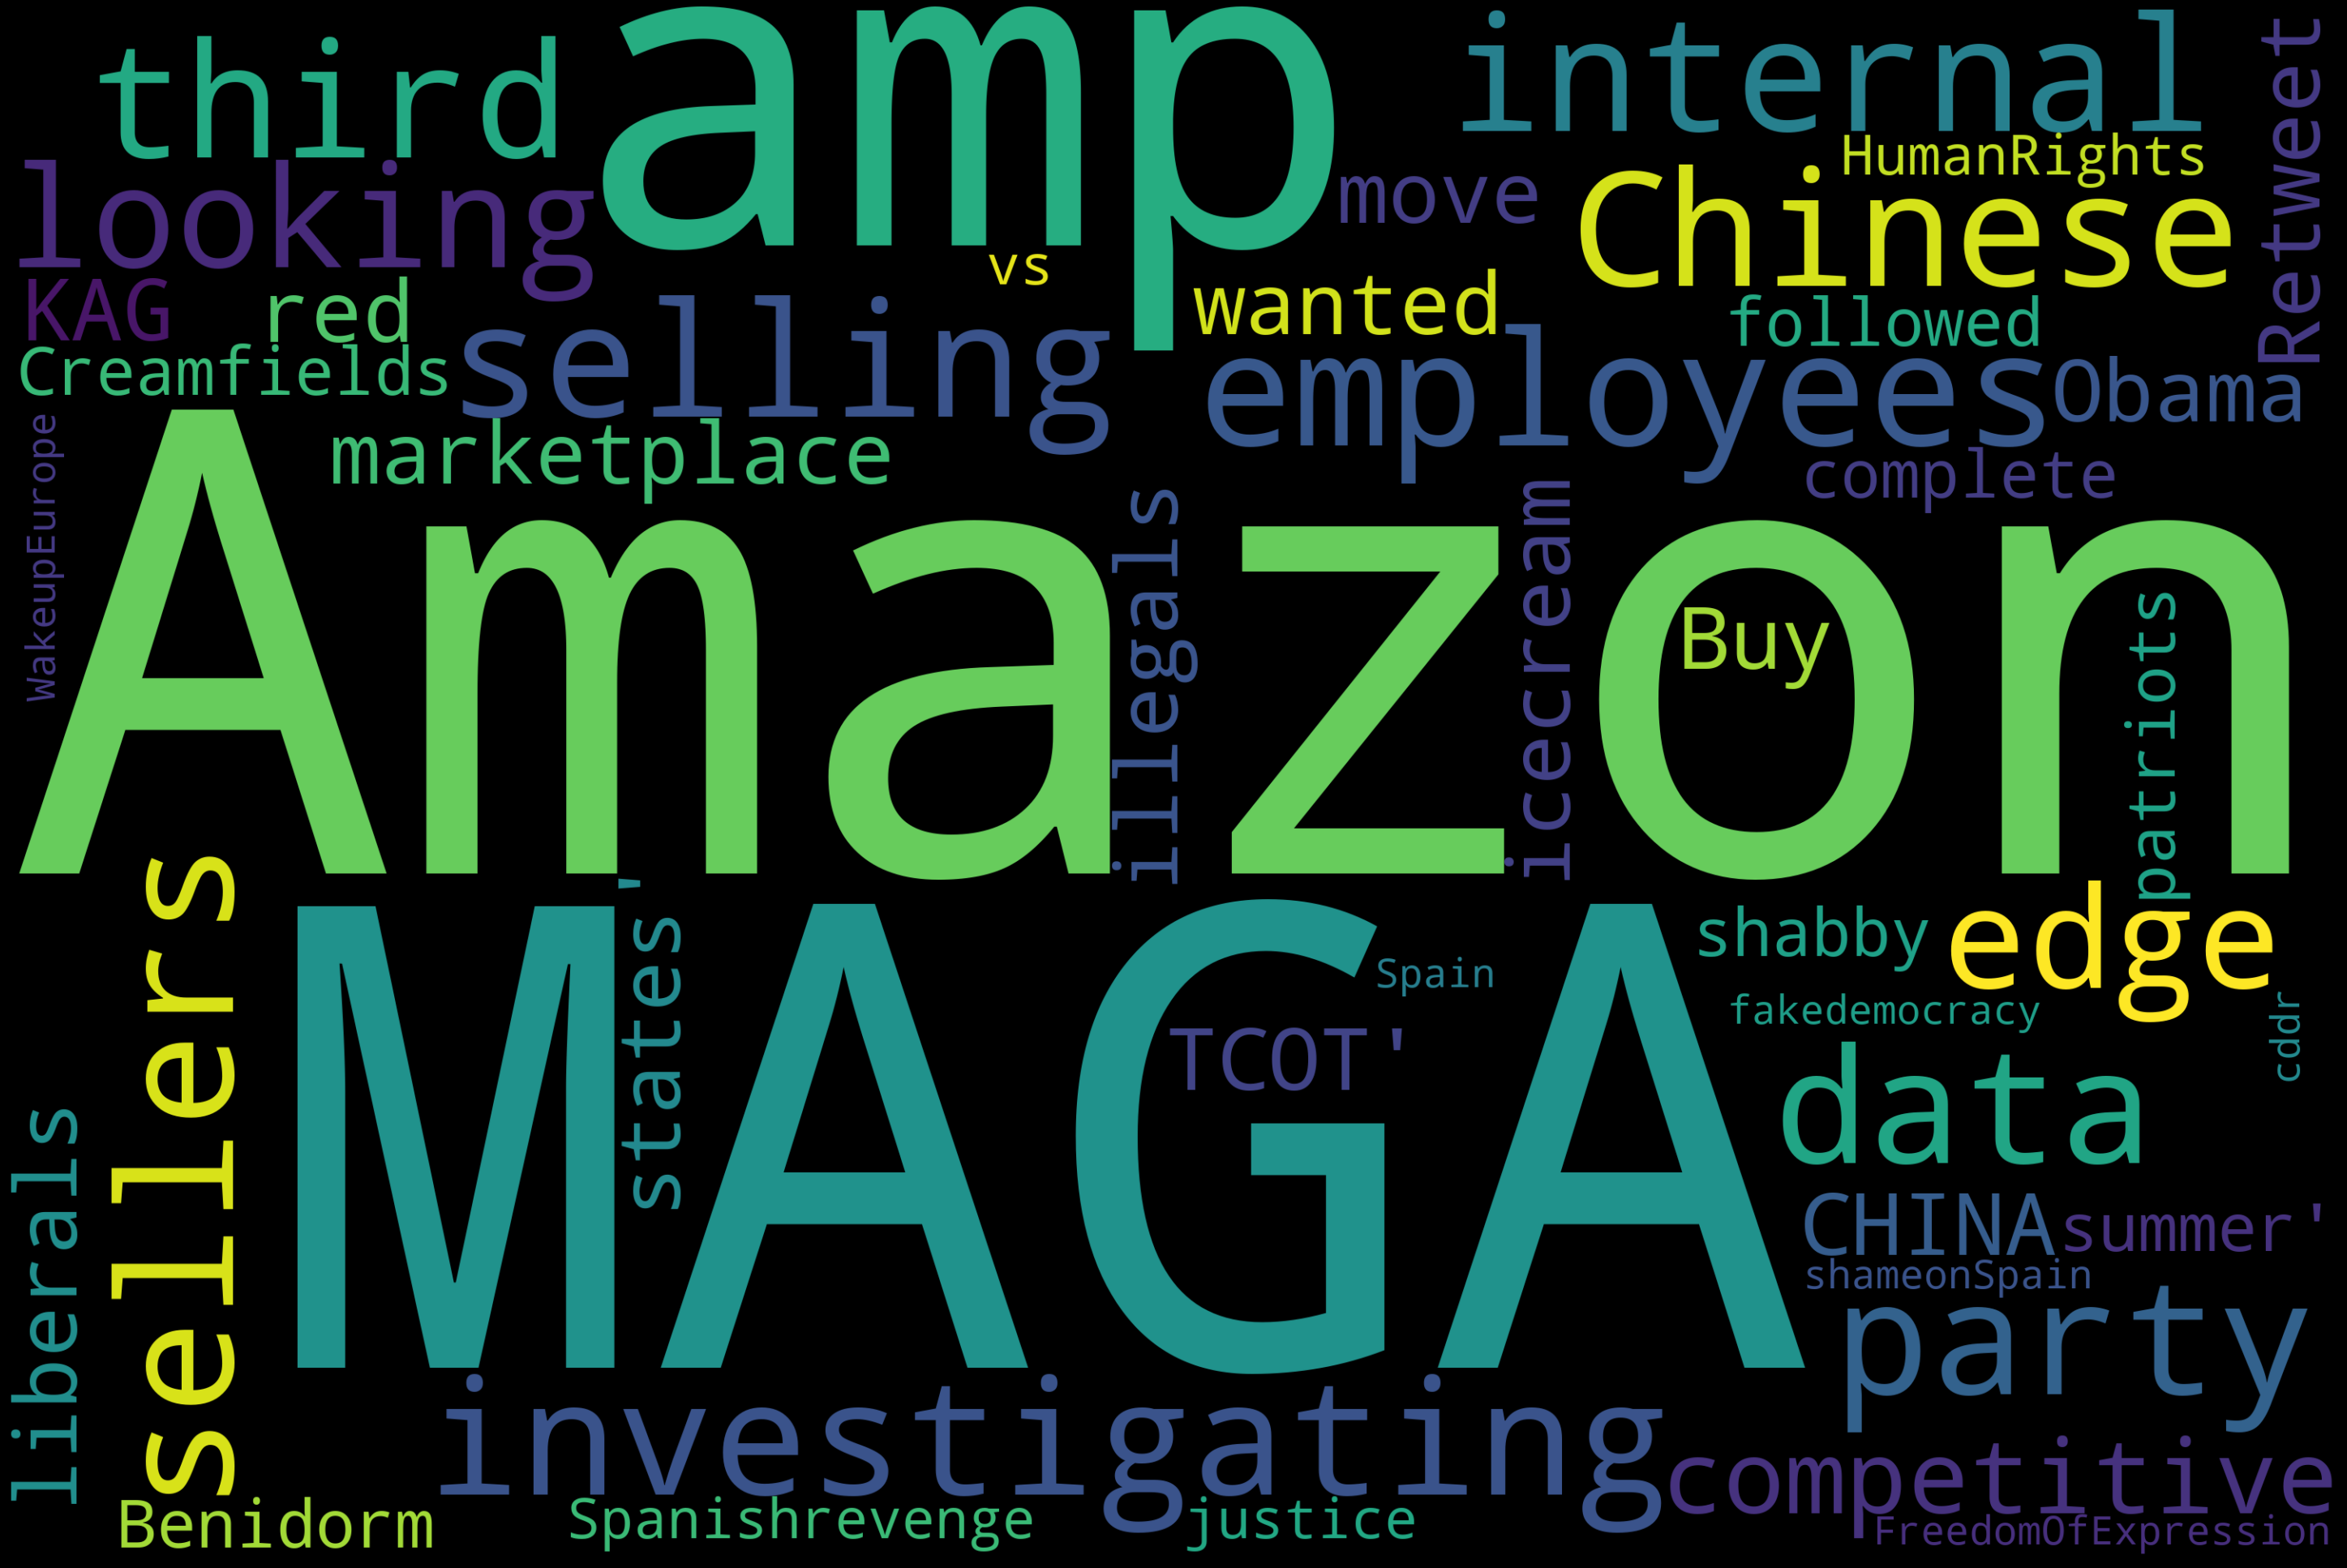

In [8]:
plot_word_cloud(NOT_OFFENSIVE)

word cloud for offensive posts

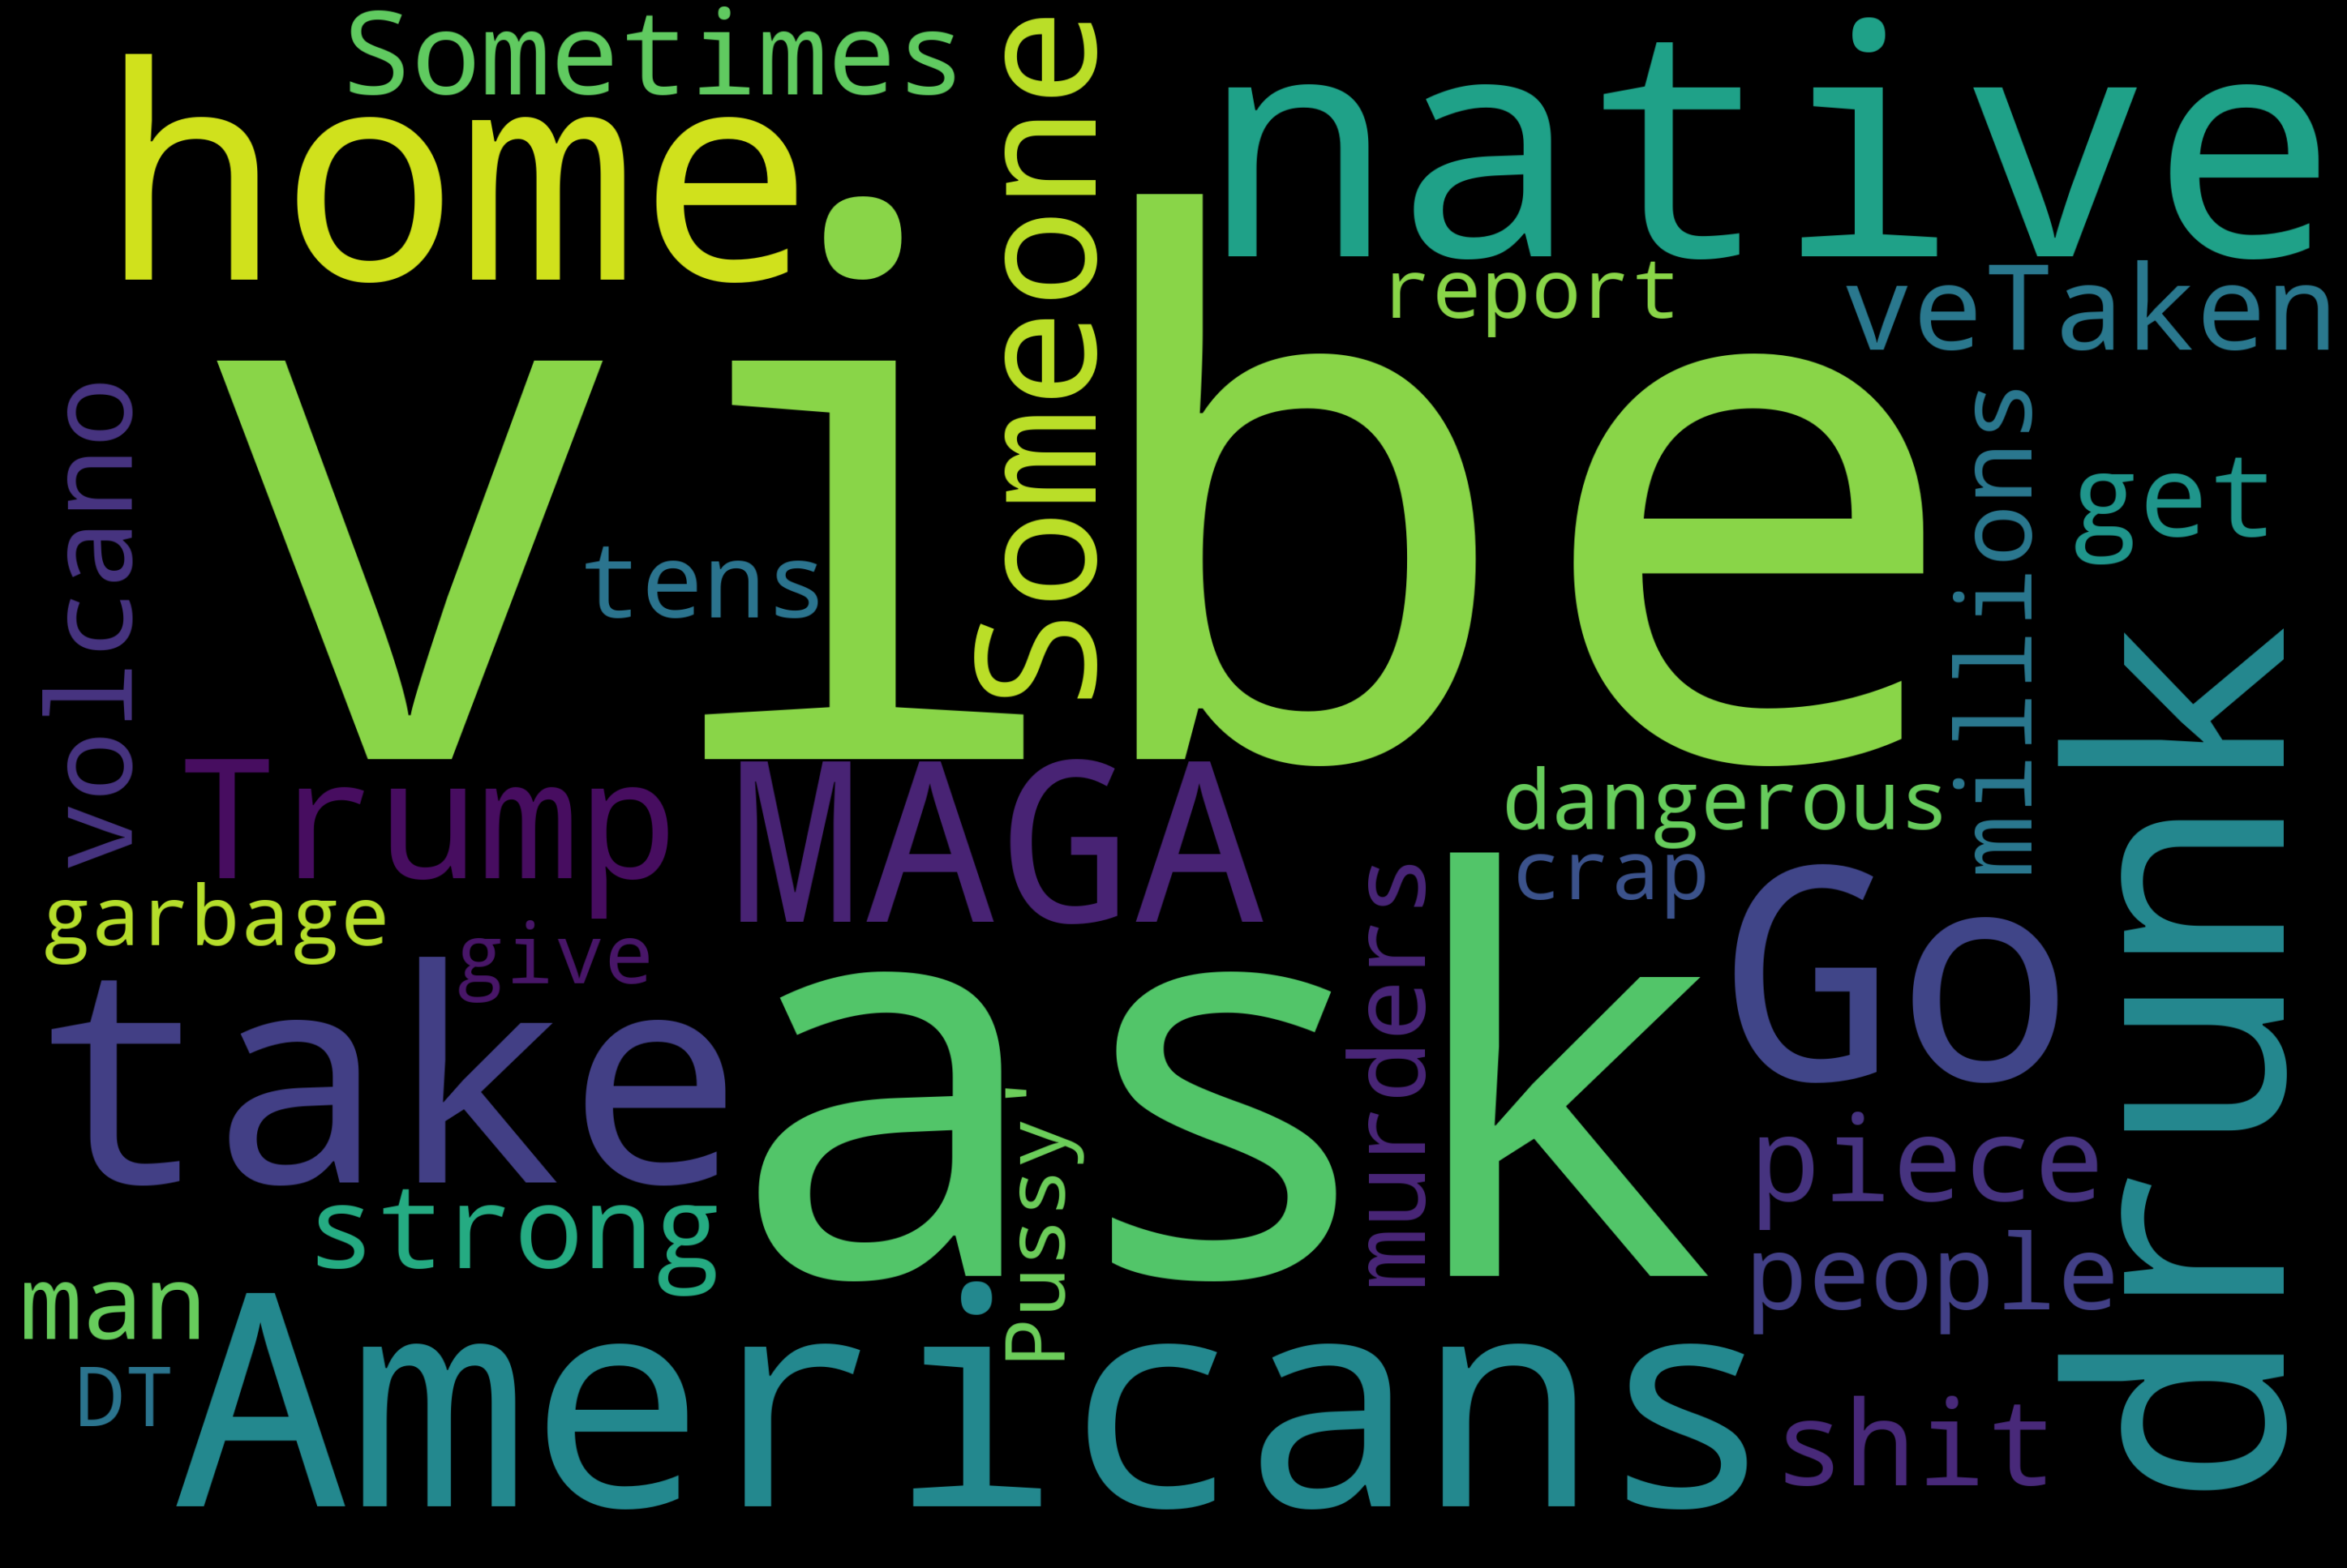

In [9]:
plot_word_cloud(OFFENSE)

### Visualising the support file

In [10]:
data = pd.read_csv("data/English/task_a_distant.tsv", sep='\t')

data[:10]

,id,text,average,std
0,1159533701270663168,@USER too much thoughts inside his headdd we c...,0.305954,0.163951
1,1159533701283352576,"First time I heard his name in camp, he seems ...",0.194293,0.184831
2,1159533703522992128,When I go to drink with Tsubaki he would alway...,0.295330,0.161962
3,1159533703758061570,@USER His ass need to stay up 😂😂,0.833349,0.140700
4,1159533703904800769,most important tweet of the day : Fuck Donald ...,0.564527,0.187683
5,1159533705125343232,You wanna leave? then feel free cus I promise ...,0.664922,0.097097
6,1159533705397977088,@USER lmfao it’s gotta be a highlight video of...,0.343644,0.108114
7,1159533705687457792,@USER -10/10 Will sooner put him on his ass i...,0.744753,0.136354
8,1159533707855912960,@USER Paul Hollywood - I wouldn’t hear a word ...,0.301610,0.143580
9,1159533707901972481,"@USER Yeah, I am pretty sure racism is illegal...",0.470942,0.121085


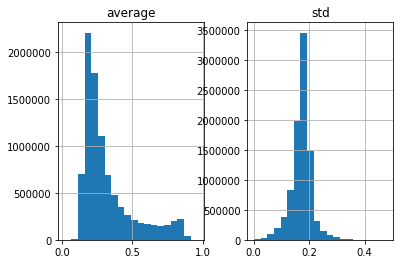

In [11]:
hist = data.hist(bins=20, column = ['average', 'std'])

In [16]:
def filter_supportfile(df):
    df['subtask_a'] = df["average"].apply(lambda x: label(x))
    filtered_df = df.loc[(df['std'] < 0.2)]
    return filtered_df


def label(x):
    if x > 0.5:
        return 'OFF'
    else:
        return 'NOT'

In [17]:
filtered_data = filter_supportfile(data)
filtered_data['tweet'] = filtered_data['text']

/home/tharindu/anaconda3/envs/sentence_classification_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from visualisation import plot_word_cloud

NOT_OFFENSIVE = filtered_data[(filtered_data['subtask_a'] == 'NOT')]
OFFENSE = filtered_data[(filtered_data['subtask_a'] == 'OFF')]

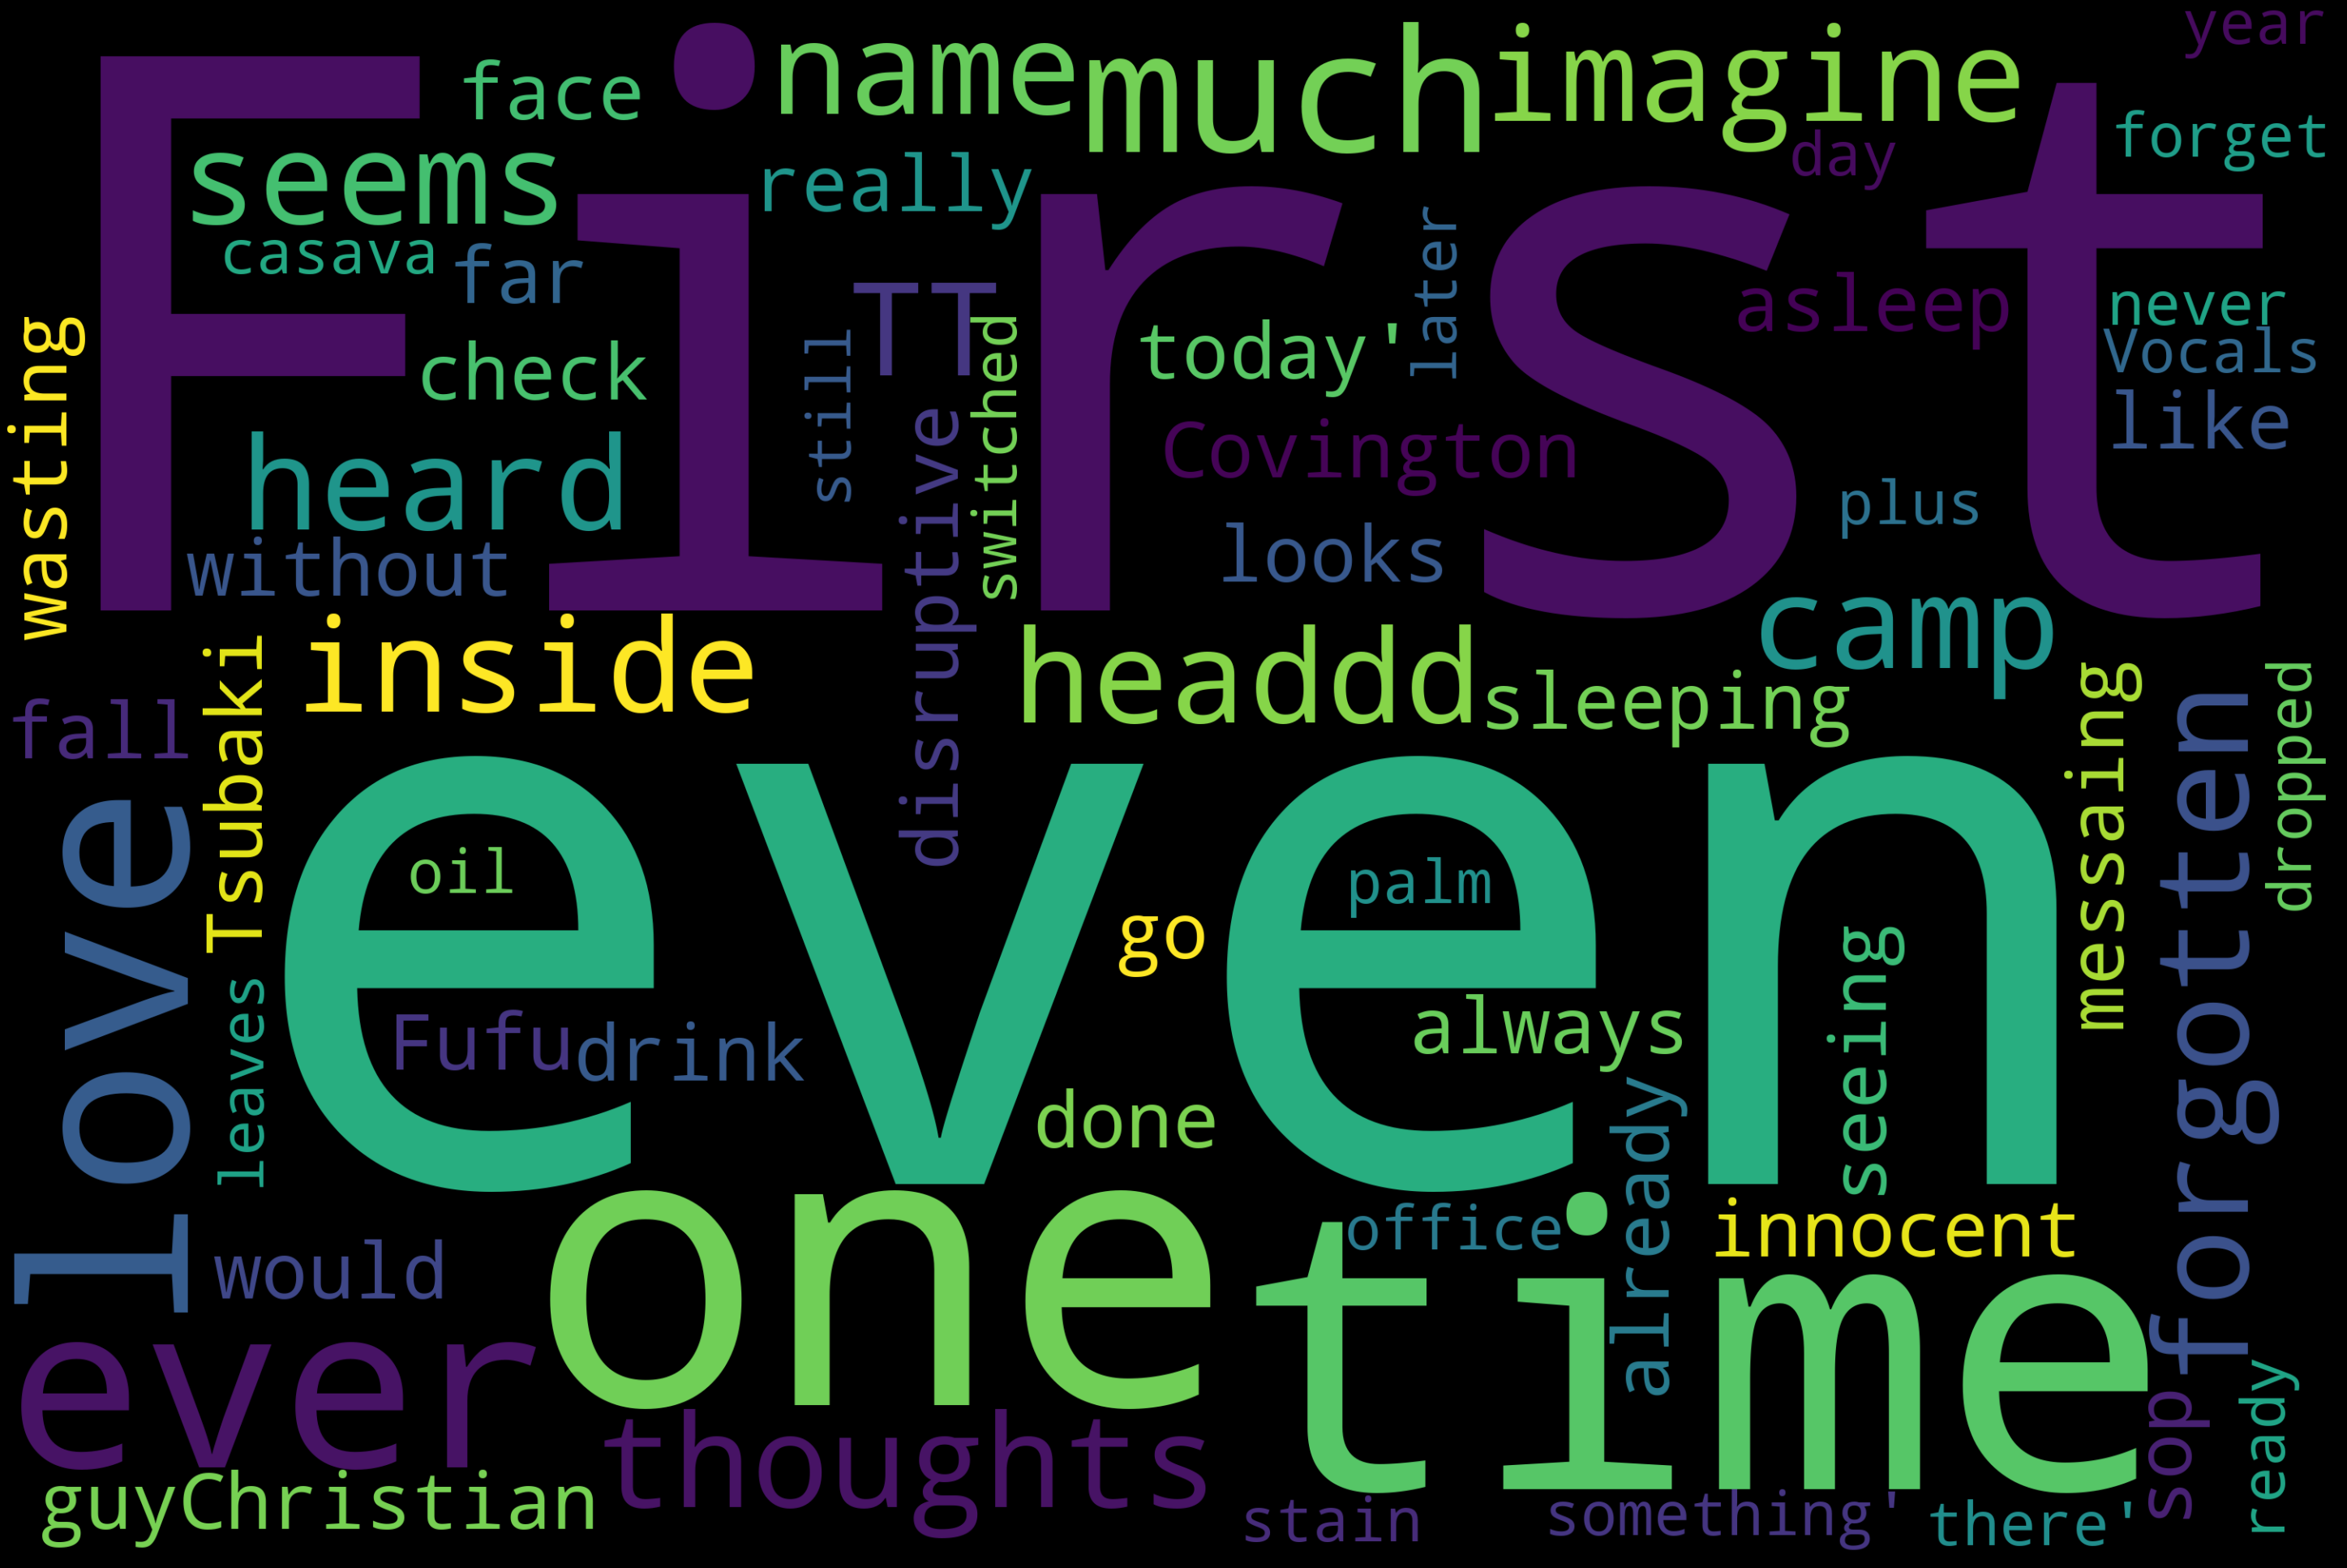

In [19]:
plot_word_cloud(NOT_OFFENSIVE)

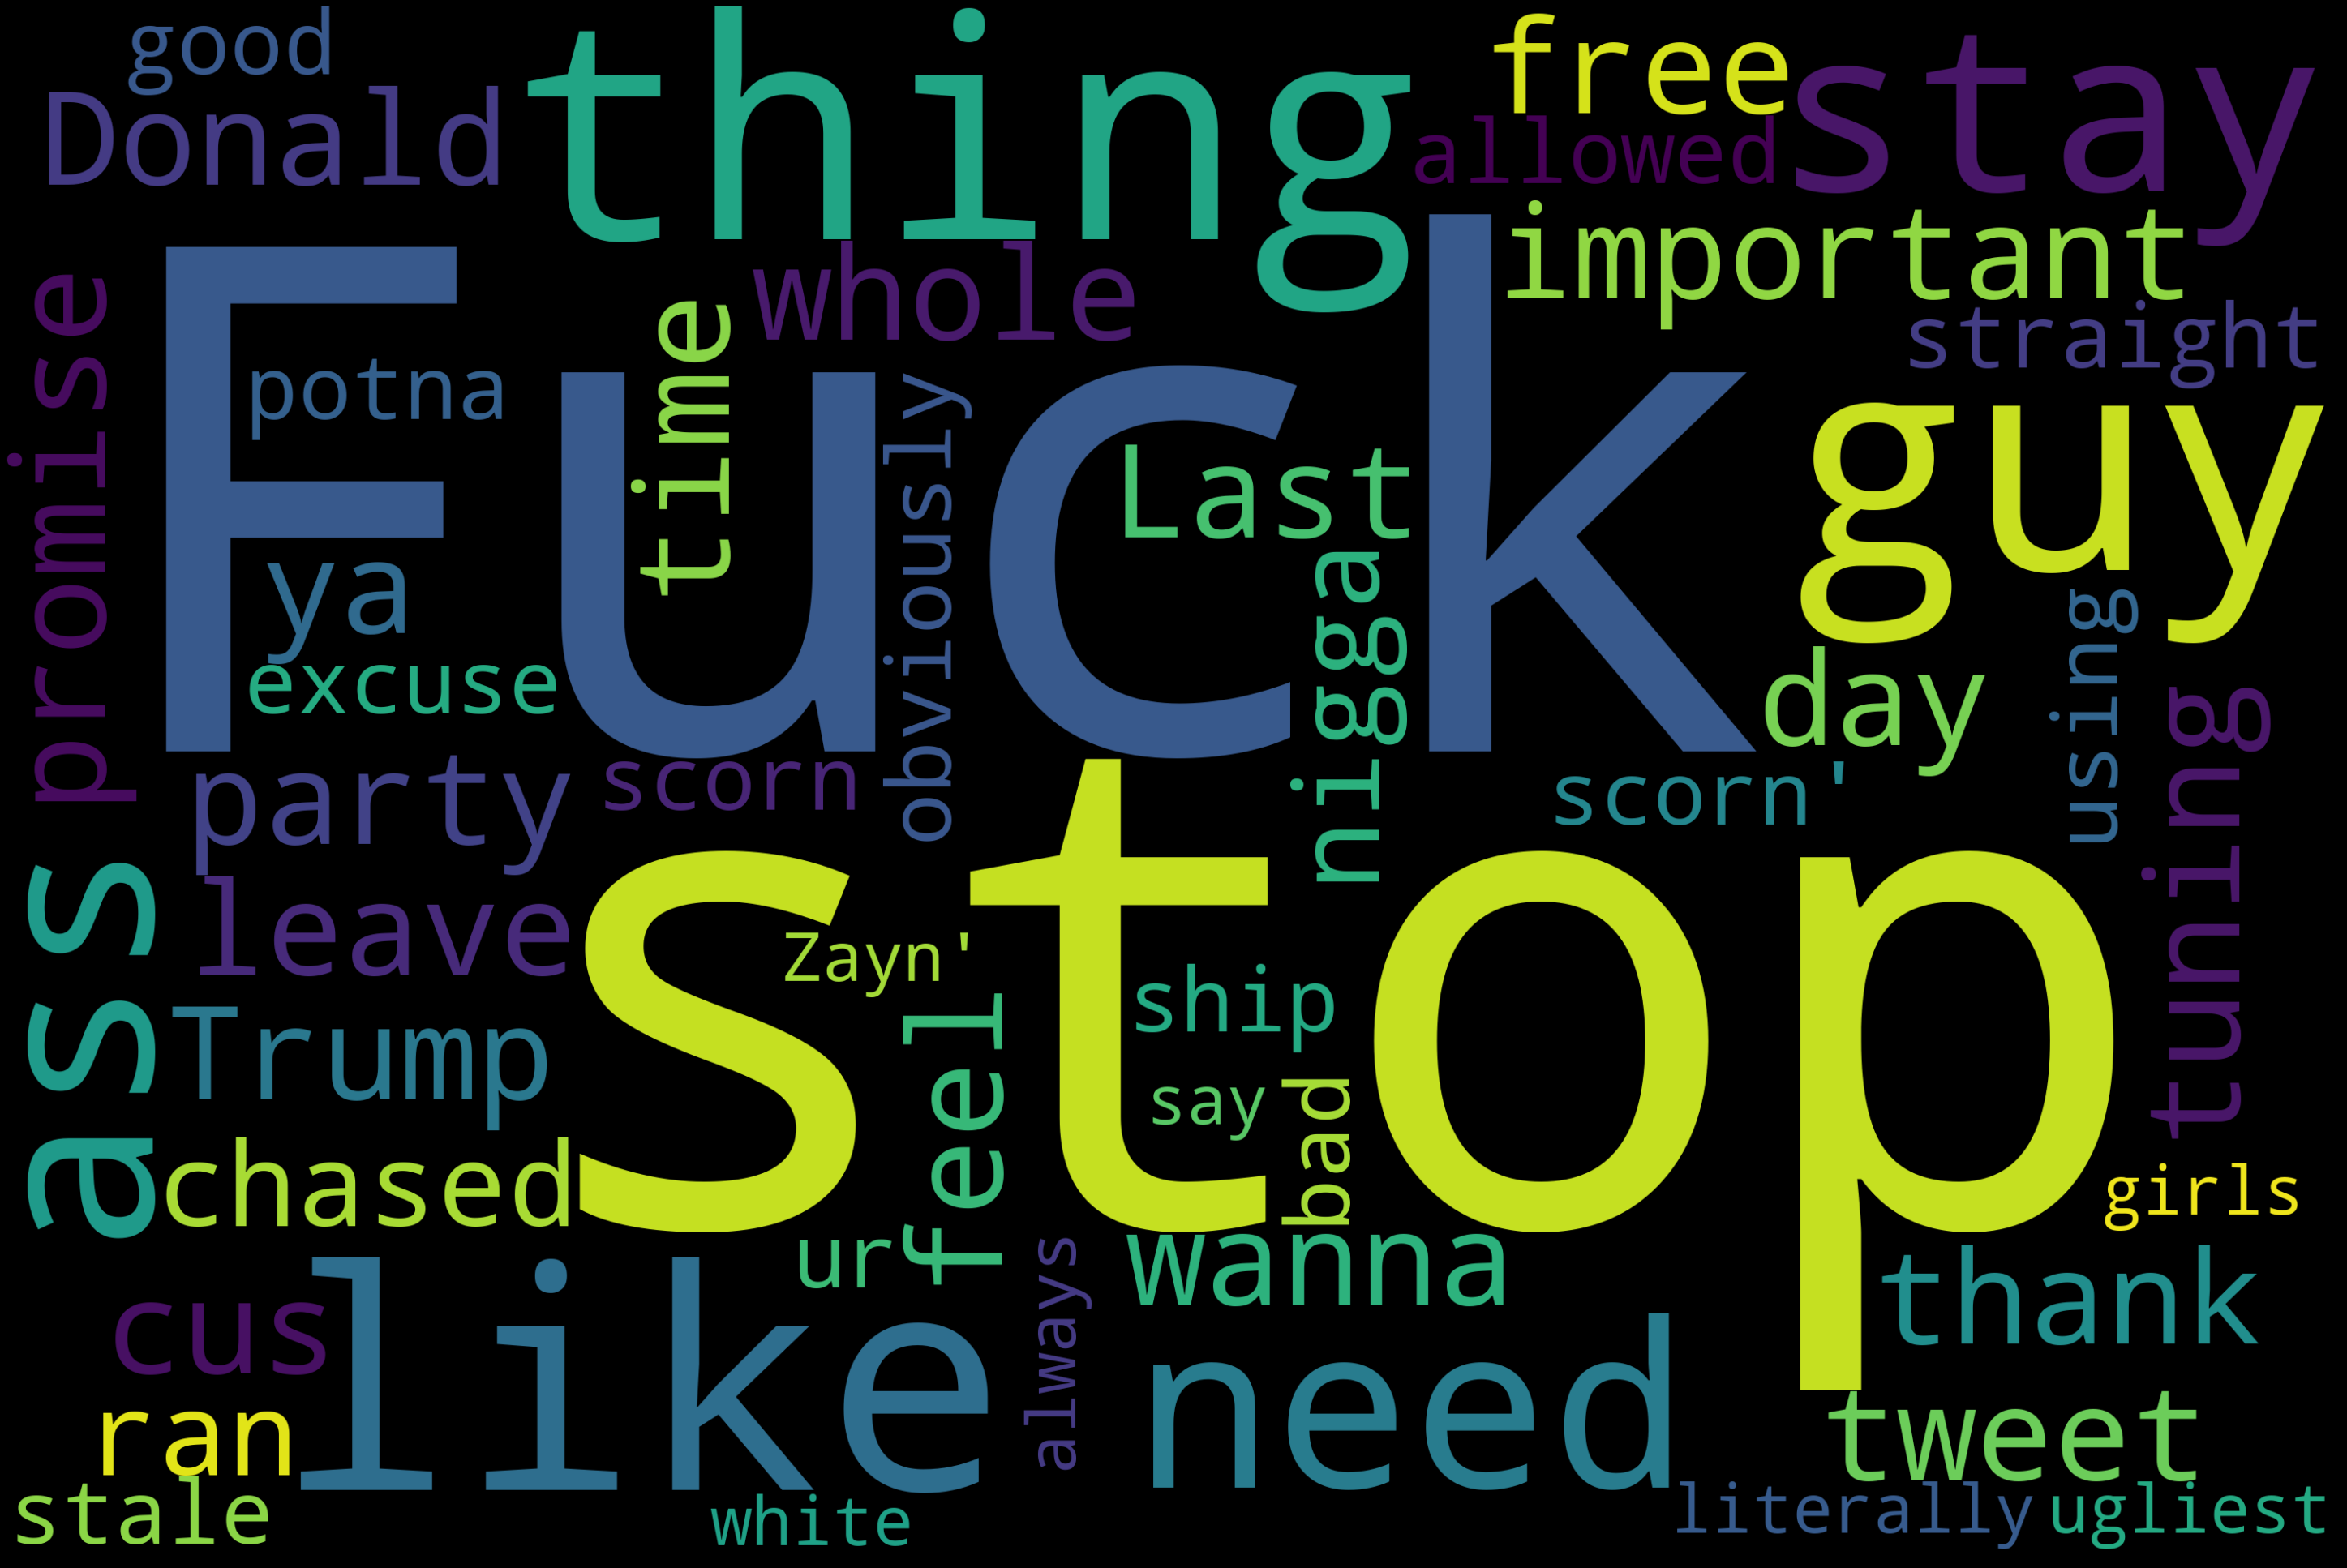

In [21]:
plot_word_cloud(OFFENSE)


In [ ]:
pd.Series(' '.join(OFFENSE.tweet).split()).value_counts()[:20]

.       1085647
the      629447
I        510884
’        469179
to       437810
a        435655
and      370969
,        323665
you      307366
of       295488
is       286138
that     265365
'        232130
!        222548
in       219579
s        214232
it       208082
t        201656
?        198464
shit     185744
dtype: int64